# Selection network architecture with genetics algorithm

This notebook is inspired by the following paper: [Efficient Architecture Search for Deep Neural Networks](https://www.sciencedirect.com/science/article/pii/S1877050920303859)

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


### Import dataset

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


### Define basic network

In [82]:
# possiamo migliorare probabilmente la struttura di base: Erika ne saprà di più. Questo è un piccolo sketch preso dall'articolo.
# Per ora, ma solo guardando ad occhio l'output, sembra che all'aumentare del numero di layer "cromosomi" si perda informazione nell'immagine. 

class Individual(nn.Module):
    def __init__(self, chromo):
        super().__init__()
        transition_layer = nn.ModuleList([nn.BatchNorm2d(3), nn.Conv2d(3, 3, kernel_size= (1,1)),nn.ReLU(), nn.MaxPool2d(kernel_size= (2,2))])
        self.layers = nn.ModuleList()
        for module_list in chromo:
            for layer in transition_layer:
                module_list.append(layer)

            self.layers.append(nn.BatchNorm2d(3))
            for layer in module_list:
              self.layers.append(layer)
            self.layers.append(nn.ReLU())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


### Define chromosomes

In this version each image will feed in the whole network with different kernel size. The kernel size will be selected by the genetic algorithm.

In [76]:
chromo = [ [nn.Conv2d(3,3,3), nn.Conv2d(3,3,kernel_size=(3,1))], [nn.Conv2d(3,3,kernel_size=(1,7)), nn.Conv2d(3,3,kernel_size=(7,1))], 
[nn.Conv2d(3,3,3)], [nn.Conv2d(3,3,3, dilation=2)], [nn.Conv2d(3,3,1)] ]   # mancano le depthwise convolution 

Create an instance of the network with the corresponding chromosome:

In [77]:
individual = Individual(chromo[1:4])

Plot the the output of the network:

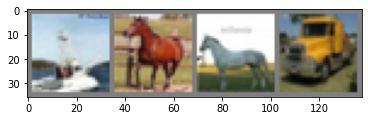

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


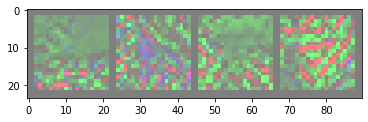

In [84]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(individual(images)))